# Adjusted Carbon Offset by Landmass  
This plot shows the potential adjusted carbon offset by state landmass. It uses adjusted data from Google's Project Sunroof and information provided by the 2010 census (via Wikipedia). States with a higher landmass have more space for buildings for Project Sunroof to utilize. That doesn't mean the states with high landmass actually have more buildings, just that they have the potential for more buildings. It makes sense explore this information to look for patterns, and search for good places to implement Project Sunroof to prove or disprove it's viability nationwide. 

In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
#Import adjusted carbon offset data from CSV.
adjusted_carbon_offset_working_df = pd.read_csv('../Resources/OtherData/adjusted_carbon_offset.csv')
adjusted_carbon_offset_df = adjusted_carbon_offset_working_df.reindex(columns = ['state', 'adjusted_carbon_offset_metric_tons'])
adjusted_carbon_offset_df.head()

,state,adjusted_carbon_offset_metric_tons
0,Alabama,1.055440e+07
1,Alaska,3.199207e+05
2,Arizona,1.513840e+07
3,Arkansas,5.142536e+06
4,California,3.589850e+07


In [8]:
#import State Landmass data into pandas from CSV.
state_landmass_working_df = pd.read_csv('../Resources/OtherData/state-surface-area.csv')
state_landmass_df = state_landmass_working_df.reindex(columns= ['State', 'sq mi'])
state_landmass_df = state_landmass_df.rename(columns = {'State': 'state'})
state_landmass_df.head()

,state,sq mi
0,Alabama,50645.33
1,Alaska,570640.95
2,Arizona,113594.08
3,Arkansas,52035.48
4,California,155779.22


In [11]:
#join the dataframes to calculate needed information.
carbon_offset_by_land_df = adjusted_carbon_offset_df.join(state_landmass_df.set_index('state'), on = 'state')
carbon_offset_by_land_df = carbon_offset_by_land_df.rename(columns= {'adjusted_carbon_offset_metric_tons':'carbon_offset', 'sq mi': 'surface_area'})
carbon_offset_by_land_df.head()

,state,carbon_offset,surface_area
0,Alabama,1.055440e+07,50645.33
1,Alaska,3.199207e+05,570640.95
2,Arizona,1.513840e+07,113594.08
3,Arkansas,5.142536e+06,52035.48
4,California,3.589850e+07,155779.22


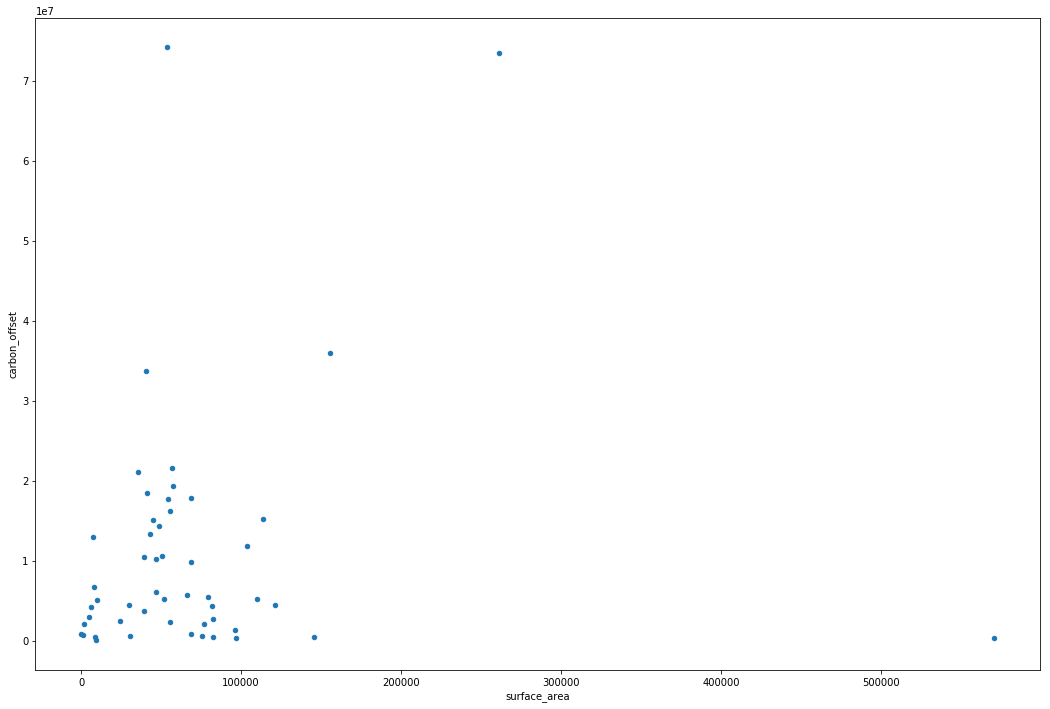

In [12]:
#Scatter Plot of Adjusted Carbon Offset by Landmass, and save as a png file.

# plot the data
carbon_offset_by_land_df.plot.scatter(x='surface_area', y='carbon_offset', figsize = (18,12))

#titles
plt.title.('CArbon Offset by State Area')